Clone GitHub [repository](https://github.com/ultralytics/yolov5), install [dependencies](https://github.com/ultralytics/yolov5/blob/master/requirements.txt) and check PyTorch and GPU.

In [2]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt  # install

import torch
import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 v7.0-72-g064365d Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 23.6/78.2 GB disk)


Export to ONNX models

In [3]:
!python export.py --weights yolov5n-cls.pt --include onnx --imgsz 224 224 --opset 12
!python export.py --weights yolov5s-cls.pt --include onnx --imgsz 224 224 --opset 12
!python export.py --weights yolov5m-cls.pt --include onnx --imgsz 224 224 --opset 12

export: data=data/coco128.yaml, weights=['yolov5n-cls.pt'], imgsz=[224, 224], batch_size=1, device=cpu, half=False, inplace=False, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=12, verbose=False, workspace=4, nms=False, agnostic_nms=False, topk_per_class=100, topk_all=100, iou_thres=0.45, conf_thres=0.25, include=['onnx']
YOLOv5 🚀 v7.0-72-g064365d Python-3.8.10 torch-1.13.1+cu116 CPU

100% 4.87M/4.87M [00:00<00:00, 5.72MB/s]

Fusing layers... 
Model summary: 117 layers, 2489464 parameters, 0 gradients, 3.9 GFLOPs

PyTorch: starting from yolov5n-cls.pt with output shape (1, 1000) (4.9 MB)
requirements: YOLOv5 requirement "onnx>=1.12.0" not found, attempting AutoUpdate...
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.9.2 requires protobuf<3.20,>=3.9.2, but you have protobuf 3.20.3 which is incompatible.
tensorboard 2

Test models

classify/predict: weights=['yolov5n-cls.onnx'], source=data/images, data=data/coco128.yaml, imgsz=[224, 224], device=, view_img=False, save_txt=False, nosave=False, augment=False, visualize=False, update=False, project=runs/predict-cls, name=exp, exist_ok=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-72-g064365d Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)

Loading yolov5n-cls.onnx for ONNX Runtime inference...
image 1/2 /content/yolov5/data/images/bus.jpg: 224x224 minibus 0.46, police van 0.16, jeep 0.03, pulled rickshaw 0.03, amphibious vehicle 0.02, 2.6ms
image 2/2 /content/yolov5/data/images/zidane.jpg: 224x224 rugby ball 0.28, suit 0.13, bow tie 0.04, bridegroom 0.03, trombone 0.02, 2.6ms
Speed: 0.3ms pre-process, 2.6ms inference, 0.1ms NMS per image at shape (1, 3, 224, 224)
Results saved to runs/predict-cls/exp2


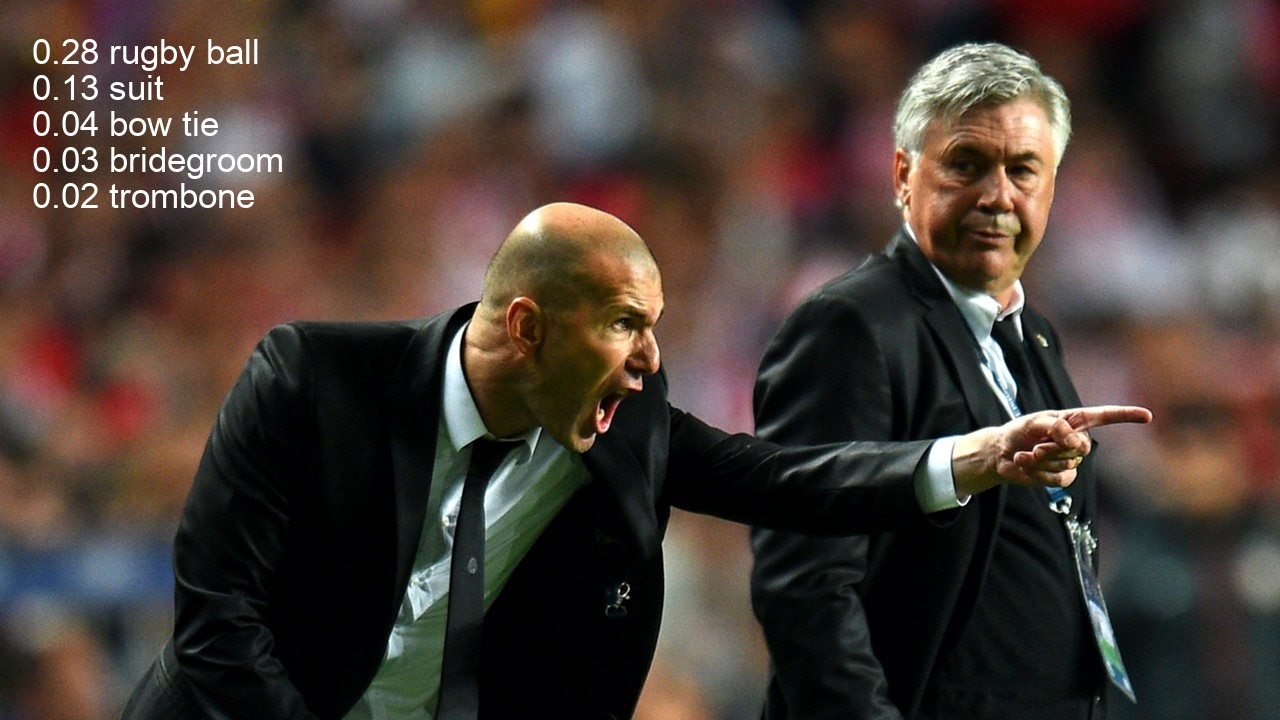

In [5]:
#@title 
!python classify/predict.py --weights yolov5n-cls.onnx --img 224 --source data/images
display.Image(filename='runs/predict-cls/exp/zidane.jpg', width=600)